#### Encode inputs into the amplitude of a vector using rotation encoding.

In [1]:
from qiskit import *
from qiskit.quantum_info import *
from qiskit.circuit.library import *

import math 
import numpy as np
from random import randrange

In [2]:
def beta_j_s(j, s, alpha):
    num = math.sqrt(sum([alpha[(((2*j)-1)*(2**(s-1)))+l]**1 for l in range(1,2**(s-1)+1)]))
    den = math.sqrt(sum([alpha[((j-1)*(2**s))+l]**1 for l in range(1,2**s+1)]))
    return (2*math.asin(num/den) if num else 0)

alpha = [0]+[0.2, 0.8]
alpha = [0] + [0.2,0.5,0.2,0.1]
# alpha = [0 ,963, 383, 863, 351, 648, 784, 182, 39, 77, 654]


alpha = np.round(alpha/np.linalg.norm(alpha,1.0), 20)

num_qubits = int(np.ceil(np.log2(len(alpha)-1)))
total_len = 2**num_qubits
alpha = np.append(alpha, [0]*(total_len-len(alpha)+1))
[np.sqrt(i) for i in alpha[1:]]

[0.447213595499958, 0.7071067811865476, 0.447213595499958, 0.31622776601683794]

#### Calculate the rotation angles.

In [3]:
print (alpha, num_qubits)

h = {}

s = 1
for i in range(num_qubits):
    total = 2**(num_qubits-s)
    jlist = range(1, total+1)

    for j in jlist:
        h[(s,j)] = beta_j_s(j,s,alpha)
        print ((s,j), h[(s,j)])

    s += 1

QC = QuantumCircuit(num_qubits)
state = Statevector(QC)
state.draw(output="Latex")

[0.  0.2 0.5 0.2 0.1] 2
(1, 1) 2.013707370868535
(1, 2) 1.2309594173407745
(2, 1) 1.1592794807274087


<IPython.core.display.Latex object>

Beta  (2, 1) 0 Binary string :   1.1592794807274087
Beta  (1, 1) 1 Binary string :  0 2.013707370868535
Beta  (1, 2) 1 Binary string :  1 1.2309594173407745


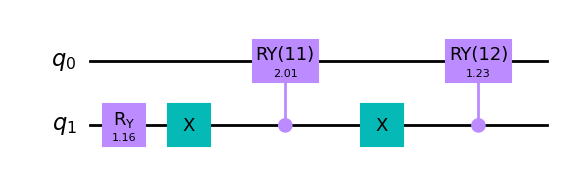

In [4]:
for wire in range(num_qubits, 0, -1):
    for j in range(1, 2**(num_qubits-wire)+1):
        bitstring = format(j-1, "#010b")[-(num_qubits-wire):] if wire != num_qubits else ""
        print ("Beta ", (wire,j),num_qubits-wire, "Binary string : ", bitstring, h[(wire,j)])
        control_wires = []
        
        if not h[(wire,j)]: 
            continue

        for i,b in zip(bitstring, range(wire, num_qubits)):
            if i == '0': 
                QC.x(b)
            control_wires.append(b)
                
        G = RYGate(h[(wire,j)], label="RY(" + str(wire) + str(j) + ")").control(len(control_wires)) if len(control_wires) else RYGate(h[(wire,j)])
        QC.append(G, control_wires + [wire-1])

        for i,b in zip(bitstring, range(wire, num_qubits)):
            if i == '0': 
                QC.x(b)

QC.draw(output='mpl', scale=1)

In [5]:
state = Statevector(QC)
state.draw(output="Latex")

<IPython.core.display.Latex object>